## Feature Construction

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')[['Age','Pclass','SibSp','Parch','Survived']]
df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [4]:
df.dropna(inplace=True)

In [5]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [6]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

np.float64(0.6933333333333332)

In [7]:
X['Family_size'] = X['SibSp'] + X['Parch'] + 1

In [8]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [9]:
myfunc(4)

1

In [10]:
X['Family_type'] = X['Family_size'].apply(myfunc)

In [11]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [12]:
X.head()

,Age,Pclass,Family_type
0,22.0,3,1
1,38.0,1,1
2,26.0,3,0
3,35.0,1,1
4,35.0,3,0


In [13]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

np.float64(0.7003174603174602)

In [14]:
df = pd.read_csv('train.csv')

In [15]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [16]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [17]:
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [18]:
df[['Title','Name']]

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [20]:
df.groupby('Title')['Survived'].mean().sort_values(ascending=False)

Title
Lady            1.000000
Ms              1.000000
Sir             1.000000
Mme             1.000000
the Countess    1.000000
Mlle            1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Major           0.500000
Col             0.500000
Dr              0.428571
Mr              0.156673
Capt            0.000000
Jonkheer        0.000000
Don             0.000000
Rev             0.000000
Name: Survived, dtype: float64

In [21]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

C:\Users\uzebk\AppData\Local\Temp\ipykernel_9624\2254989826.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
C:\Users\uzebk\AppData\Local\Temp\ipykernel_9624\2254989826.py:2: SettingWithCopyW

# PCA

In [25]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df,df1],ignore_index=True)

df = df.sample(40)

In [26]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [27]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
            color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                            line=dict(width=2,
                                        color='DarkSlateGrey')),
                    selector=dict(mode='markers'))

fig.show()

In [28]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [29]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [30]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [31]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [32]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


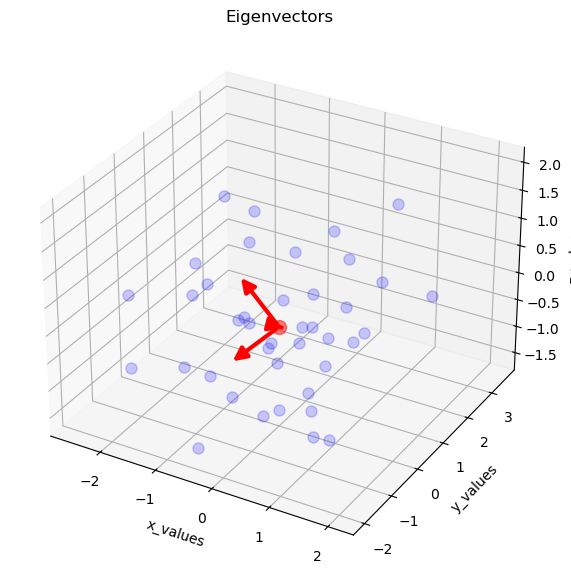

In [41]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)   # keeps z-order correct


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# scatter points
ax.plot(df['feature1'], df['feature2'], df['feature3'], 
        'o', markersize=8, color='blue', alpha=0.2)

# plot mean point
ax.plot([df['feature1'].mean()], 
        [df['feature2'].mean()], 
        [df['feature3'].mean()], 
        'o', markersize=10, color='red', alpha=0.5)

# draw eigenvector arrows
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], 
                [df['feature2'].mean(), v[1]], 
                [df['feature3'].mean(), v[2]], 
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')
plt.show()


In [42]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [43]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [45]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                y=new_df['PC2'],
                color=new_df['target'],
                color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                            line=dict(width=2,
                                        color='DarkSlateGrey')),
                selector=dict(mode='markers'))
fig.show()

In [47]:
df=pd.read_csv('traino.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.shape

(42000, 785)

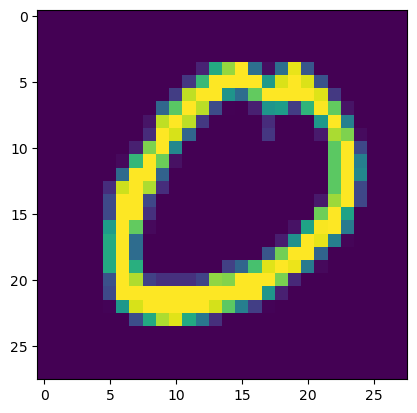

In [50]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))
plt.show()

In [51]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.shape

(33600, 784)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

7.150051593780518


In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [62]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [63]:
X_train_trf.shape

(33600, 200)

In [64]:
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train_trf,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [66]:
y_pred = knn.predict(X_test_trf)

In [67]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

In [69]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [70]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]], shape=(33600, 2))

In [84]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [72]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [74]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    z=X_train_trf[:, 2],
    color=y_train_trf
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [75]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023401, 26.74459621])

In [76]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [77]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [78]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [79]:
pca.explained_variance_.shape

(784,)

In [80]:
pca.components_.shape

(784, 784)

In [81]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

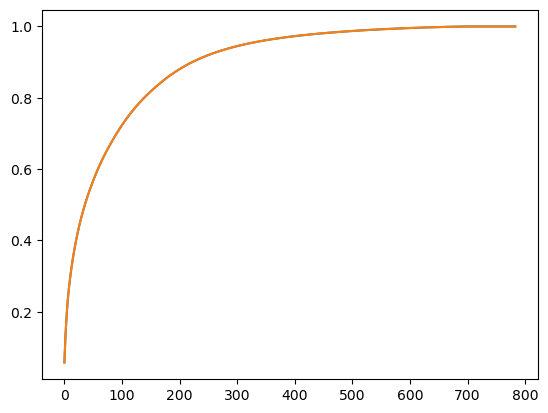

In [83]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()